## NMF-PY Walkthrough

### Input Data Analysis

Input data statistics are provided in PMF5 after the user provides concentration and uncertainty data files.


In [1]:
# Python imports

import os
import sys
import copy
import logging
import time
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.data.datahandler import DataHandler
from src.model.base_nmf import BaseSearch
from tests.factor_comparison import FactorComp

In [2]:
# PMF5 provided input data files
# PMF5 example input files for the Baton Rouge dataset

input_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-con.csv")
uncertainty_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-unc.csv")
output_path = os.path.join("D:\\", "projects", "nmf_py", "output", "BatonRouge")

In [3]:
# Load data files and calculate statistics
# Category is defaulted to 'Strong' and has not been integrated into the NMF workflow.

dh = DataHandler(
        input_path=input_file,
        uncertainty_path=uncertainty_file,
        output_path=output_path,
        index_col='Date'
    )
dh.metrics

23-Feb-23 13:13:23 - Input and output configured successfully


,Category,S/N,Min,25th,50th,75th,Max
124-Trimethylbenzene,Strong,5.445168,0.005000,0.820001,1.290001,1.865001,5.470003
224-Trimethylpentane,Strong,5.666667,0.410000,1.580001,2.490002,3.865002,13.560008
234-Trimethylpentane,Strong,5.537459,0.005000,0.530000,0.820001,1.300001,4.410003
23-Dimethylbutane,Strong,5.500543,0.005000,0.640000,1.110001,2.285001,10.500007
23-Dimethylpentane,Strong,5.463626,0.005000,0.340000,0.490000,0.780000,3.310002
2-Methylheptane,Strong,5.039088,0.005000,0.215000,0.330000,0.535000,2.480002
3-Methylhexane,Strong,5.648208,0.005000,0.655000,1.050001,1.510001,7.780005
3-Methylpentane,Strong,5.611292,0.540000,1.720001,2.990002,5.945004,29.100018
Acetylene,Strong,5.666667,0.380000,1.410001,1.990001,2.835002,8.070005
Benzene,Strong,5.666667,0.590000,1.960001,2.770002,4.440003,9.330006


23-Feb-23 13:13:24 - Loaded backend module://matplotlib_inline.backend_inline version unknown.
23-Feb-23 13:13:24 - Loaded backend module://matplotlib_inline.backend_inline version unknown.


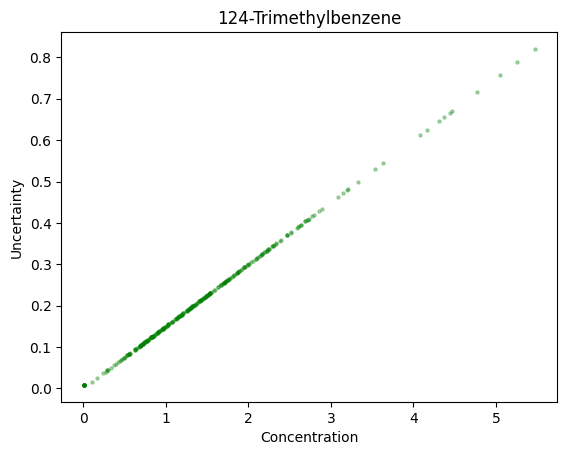

In [4]:
# Scatter plot concentration vs uncertainty
import warnings
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)


species = "124-Trimethylbenzene"

concentration_data = dh.input_data[species]
uncertainty_data = dh.uncertainty_data[species]
plt.scatter(x=concentration_data, y=uncertainty_data, s=5, c='green', alpha=0.3)
plt.title(f"{species}")
plt.xlabel("Concentration")
plt.ylabel("Uncertainty")
plt.show()

In [5]:
# Base model paramters

n_components = 4            # number of factors
method = "mu"               # minimization algorithm: 'mu' multiplicative update - Kullback-Leibler, 'euc' multiplicative update - frobenius, 'is' multiplicative update - itakura-saito, 'gd' gradient descent, 'cg' conjugate descent
seed = 42                   # randomization seed
epochs = 5                  # number of models to create
max_iterations = 10000      # max number of iterations to run for multiplicative update models
converge_delta = 0.1       # the amount of change between iterations for a multiplicative model considered converged
converge_n = 100            # the number of iterations required with a loss change of less than converge_delta for the model to be considered converged

V = dh.input_data_processed
U = dh.uncertainty_data_processed

In [ ]:
# Kullback-Leibler divergence with weights
# https://www.researchgate.net/publication/221080181_Kullback-Leibler_Divergence_for_Nonnegative_Matrix_Factorization

base = BaseSearch(n_components=n_components, method=method, V=V, U=U, seed=seed, epochs=epochs, max_iterations=max_iterations, converge_delta=converge_delta, converge_n=converge_n)
base.train()

Epoch: 4, Seed: 43301, Q(true): 123810.8125:  16%|████▊                          | 1555/10000 [00:05<00:29, 282.57it/s]

In [9]:
save_output_path = f"{method}-e{epochs}-c{n_components}.json"
base.save(output_name=save_output_path)

In [10]:
pmf_file = os.path.join("D:\\", "projects", "nmf_py", "data", f"baton-rouge_{n_components}f_profiles.txt")
profile_comparison = FactorComp(nmf_output=save_output_path, pmf_output=pmf_file, factors=n_components, species=41)
profile_comparison.compare()

R2 - Model: 2, Best permutations: ['Factor 3', 'Factor 1', 'Factor 2', 'Factor 4'], Average: 0.9874079164133305, Factors: [0.9857524618888542, 0.9794769016842408, 0.9848925387826786, 0.9995097632975485]


In [6]:
# LS-NMF (weighted frobenius divergence) - available in NMF R package
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1450309/

method = "euc"
max_iterations = 40000
converge_delta = 0.1
converge_n = 50
base = BaseSearch(n_components=n_components, method=method, V=V, U=U, seed=seed, epochs=epochs, max_iterations=max_iterations, converge_delta=converge_delta, converge_n=converge_n)
base.train()

Epoch: 2, Seed: 65457, Q(true): 239192.265625:  22%|██████▍                      | 8887/40000 [00:36<01:59, 259.88it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch: 4, Seed: 43301, Q(true): 239408.578125:   3%|▊                            | 1039/40000 [00:03<02:10, 297.72it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch: 4, Seed: 43301, Q(true): 239196.734375:  10%|██▊                          | 3877/40000 [00:13<02:16, 264.85it/s]IOPub m

In [7]:
save_output_path = f"{method}-e{epochs}-c{n_components}.json"
base.save(output_name=save_output_path)
pmf_file = os.path.join("D:\\", "projects", "nmf_py", "data", f"baton-rouge_{n_components}f_profiles.txt")
profile_comparison = FactorComp(nmf_output=save_output_path, pmf_output=pmf_file, factors=n_components, species=41)
profile_comparison.compare()

R2 - Model: 3, Best permutations: ['Factor 4', 'Factor 3', 'Factor 1', 'Factor 2'], Average: 0.945083432629196, Factors: [0.8176483959110097, 0.9860084874219778, 0.9920087374793173, 0.9846681097044793]


In [ ]:
# Itakura-Saito Divergence
# https://www.irit.fr/~Cedric.Fevotte/publications/journals/neco09_is-nmf.pdf

method = "is"
base = BaseSearch(n_components=n_components, method=method, V=V, U=U, seed=seed, epochs=epochs, max_iterations=max_iterations, converge_delta=converge_delta, converge_n=converge_n)
base.train()

Epoch: 3, Seed: 43887, Q(true): 463174.3125:  13%|████                           | 5207/40000 [00:19<02:18, 251.54it/s]

In [10]:
save_output_path = f"{method}-e{epochs}-c{n_components}.json"
base.save(output_name=save_output_path)
pmf_file = os.path.join("D:\\", "projects", "nmf_py", "data", f"baton-rouge_{n_components}f_profiles.txt")
profile_comparison = FactorComp(nmf_output=save_output_path, pmf_output=pmf_file, factors=n_components, species=41)
profile_comparison.compare()

R2 - Model: 4, Best permutations: ['Factor 4', 'Factor 1', 'Factor 2', 'Factor 3'], Average: 0.9846232940957615, Factors: [0.9900787149409445, 0.976804162797766, 0.9751030424005106, 0.996507256243825]


In [13]:
# Projected Gradient Descent
# https://www.csie.ntu.edu.tw/~cjlin/papers/pgradnmf.pdf

method = "gd"
base = BaseSearch(n_components=n_components, method=method, V=V, U=U, seed=seed, epochs=epochs, max_iterations=1, converge_delta=converge_delta, converge_n=converge_n)
base.train()

Epoch: 4, Seed: 43301, Q(true): 990342021120.0: 100%|████████████████████████████████████| 1/1 [00:16<00:00, 16.15s/it]


In [14]:
save_output_path = f"{method}-e{epochs}-c{n_components}.json"
base.save(output_name=save_output_path)
pmf_file = os.path.join("D:\\", "projects", "nmf_py", "data", f"baton-rouge_{n_components}f_profiles.txt")
profile_comparison = FactorComp(nmf_output=save_output_path, pmf_output=pmf_file, factors=n_components, species=41)
profile_comparison.compare()

R2 - Model: 3, Best permutations: ['Factor 4', 'Factor 3', 'Factor 1', 'Factor 2'], Average: 0.9669412911832233, Factors: [0.9502984892170345, 0.9739079329100577, 0.976780162950455, 0.9667785796553456]


In [6]:
# Projected Conjugate Gradient
# https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=abc10f7fa030823e284154fa84ea27e3099a038d

method = "cg"
base = BaseSearch(n_components=n_components, method=method, V=V, U=U, seed=seed, epochs=epochs, max_iterations=1, converge_delta=converge_delta, converge_n=converge_n)
base.train()

Epoch: 4, Seed: 43301, Q(true): 16383368.0: 100%|████████████████████████████████████████| 1/1 [00:17<00:00, 17.42s/it]


In [ ]:
save_output_path = f"{method}-e{epochs}-c{n_components}.json"
base.save(output_name=save_output_path)
pmf_file = os.path.join("D:\\", "projects", "nmf_py", "data", f"baton-rouge_{n_components}f_profiles.txt")
profile_comparison = FactorComp(nmf_output=save_output_path, pmf_output=pmf_file, factors=n_components, species=41)
profile_comparison.compare()

R2 - Model: 4, Best permutations: ['Factor 4', 'Factor 1', 'Factor 3', 'Factor 2'], Average: 0.5428409478078092, Factors: [0.6937663365408752, 0.5584012346044749, 0.44805362099330565, 0.471142599092581]
